In [16]:
%matplotlib inline
from collections import namedtuple
from ipywidgets import interactive
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [17]:
# some parameters we will need
x0 = 10
y0 = 2
alpha = 1
beta = 0.1
delta = 0.075
gamma = 1.5
Coeffs = namedtuple('coeffs', ['alpha', 'beta', 'delta', 'gamma'])
coeffs = Coeffs(alpha=alpha, beta=beta, delta=delta, gamma=gamma)

# [Lotka–Volterra equation](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)

$$\begin{align} \frac{dx}{dt} = \alpha x - \beta x y \\ \frac{dy}{dt} = \delta x y - \gamma y \end{align} $$

where

- $x$ is the number of prey (for example, rabbits);
    
- $y$ is the number of some predator (for example, foxes);
    
- $\tfrac{dy}{dt}$ and $\tfrac{dx}{dt}$ represent the growth rates of the two populations over time;
    
- $t$ represents time; 
    
- and $α$, $β$, $γ$, $δ$ are positive real parameters describing the interaction of the two species.

In [18]:
odeint?

In [19]:
def dX_dt(X, t, coeffs):
    
    alpha, beta, delta, gamma = coeffs
    x, y = X
    dx_dt = alpha * x - beta * x * y
    dy_dt = delta * x * y - gamma * y
    
    return np.array([dx_dt, dy_dt])

In [20]:
X0 = np.array([x0, y0])
t = np.linspace(0, 15, 200)
X = odeint(dX_dt, X0, t, args=(coeffs,))
x, y = X.T
print(t[:3], x[:3], y[:3])

[ 0.          0.07537688  0.15075377] [ 10.          10.62592145  11.29956972] [ 2.          1.89337696  1.7990321 ]


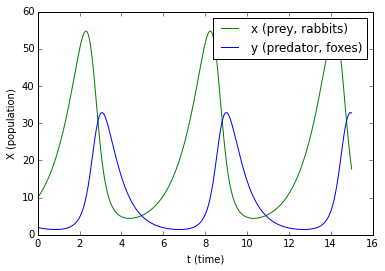

In [21]:
# a picture is worth a thousand words
fig, ax = plt.subplots()
ax.plot(t, x, color='green', label='x (prey, rabbits)')
ax.plot(t, y, color='blue', label='y (predator, foxes)')
ax.set_xlabel('t (time)')
ax.set_ylabel('X (population)')
ax.legend()

In [22]:
# put the solve-plot-part in a function...
def solve_fox_rabbit(x0=10, y0=1/2, 
                     alpha=1, beta=0.1, delta=0.075, gamma=1.5):

    coeffs = Coeffs(alpha=alpha, beta=beta, delta=delta, gamma=gamma)

    X0 = np.array([x0, y0])
    t = np.linspace(0, 15, 300)
    X = odeint(dX_dt, X0, t, args=(coeffs, ))
    x, y = X.T

    fig, ax = plt.subplots()
    ax.plot(t, x, color='green', label='x (prey, rabbits)')
    ax.plot(t, y, color='blue', label='y (predator, foxes)')
    ax.set_ylim([0, 50])
    ax.set_xlabel('t (time)')
    ax.set_ylabel('X (population)')
    ax.legend()


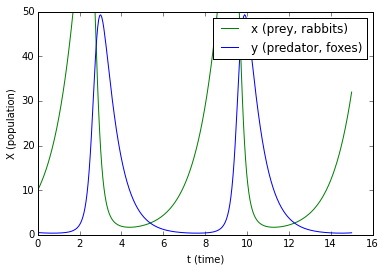

In [23]:
# ...to obtain an interactive plot
w = interactive(solve_fox_rabbit, 
                x0=(0.1, 20), y0=(0.1, 3), 
                alpha=(0., 5), beta=(0.01, 2), 
                delta=(0.01, 1), gamma=(0.1, 2))
display(w)

See also the [Lotka-Volterra-Tutorial](https://scipy.github.io/old-wiki/pages/Cookbook/LoktaVolterraTutorial).